# Tensorflow Simple Regression Practice Notebook
In this notebook we are going to get our hands dirty with pure tensorflow code. We will try to make a regression model which we train on **House price prediction** dataset and than get predictions on our train data. [Dataset Path](https://www.kaggle.com/shree1992/housedata)

### Notebook Includes

1. Dataset Preprocessing
2. Model Training
3. Model Evaluation
4. Model Improvement


In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

# Dataset Insights

First of all we will read a csv file which includes dataset. Do Some preprocessing so that we can feed it to the model and after that we will start to train our model and try to achieve the best results.

## Preprocessing Includes
1. Finding and filling/droping of null values
2. Conversion of Categorical objects to numeric (label encoding)
3. Rescaling numeric values (Standardization or Normalization)


### (Get Preprocessing from following links)
1. (Where to standardize values and where to normalize values)[https://sebastianraschka.com/Articles/2014_about_feature_scaling.html]


In [2]:
df = pd.read_csv("./dataset/regression/data.csv")
print(df.shape)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df.head()

(4600, 18)


date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-06-30 00:00:00   544000.0       3.0       2.50         1460      1613   
1  2014-05-22 00:00:00        0.0       5.0       2.25         2000      7900   
2  2014-06-16 00:00:00  1712500.0       3.0       3.25         2940      5432   
3  2014-05-04 00:00:00   365000.0       3.0       2.50         2200      7350   
4  2014-06-04 00:00:00   275000.0       3.0       2.50         1720      8755   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     2.0           0     0          3        1180            280      2007   
1     1.0           0     0          4        1300            700      1986   
2     3.0           0     3          4        2440            500      1978   
3     1.0           0     0          5        1570            630      1988   
4     1.0           0     0          3        1000            720      1983   

   yr_renovated              street         city  statezip country  
0             0  6710 Alonzo Ave NW      Seattle  WA 98117     USA  
1             0     3202 S 194th St       SeaTac  WA 98188     USA  
2          2000     150 Highland Dr      Seattle  WA 98109     USA  
3             0   13420 SE 182nd St       Renton  WA 98058     USA  
4          2009    31607 45th Pl SW  Federal Way  WA 98023     USA

### Checking if null values exists

In [3]:
df.isnull().sum()
# So we dont have any null values.

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

## Outlier Removal

Lets remove the outliers now, Let me think, Emm! Lets just do a simple thing see the number of values we got from every city.

and remove the cites with less than 5 cities

In [4]:
df.city.value_counts()

Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Issaquah                187
Kirkland                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Newcastle                33
Bothell                  33
Tukwila                  29
Vashon                   29
SeaTac                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Fall City                11
Medina                   11
Clyde Hill               11
Black Diamond             9
Ravensdale                7
Pacific             

In [5]:


cities = ["Algona",                    
"Yarrow Point",              
"Skykomish",                 
"Milton",                    
"Preston",                    
"Inglewood-Finn Hill",       
"Beaux Arts Village",        
"Snoqualmie Pass", ]

# df.drop(df[df['city'] in cities], inplace = True)
df = df[~df['city'].isin(cities)]
df.city.value_counts()


Seattle             1573
Renton               293
Bellevue             286
Redmond              235
Issaquah             187
Kirkland             187
Kent                 185
Auburn               176
Sammamish            175
Federal Way          148
Shoreline            123
Woodinville          115
Maple Valley          96
Mercer Island         86
Burien                74
Snoqualmie            71
Kenmore               66
Des Moines            58
North Bend            50
Covington             43
Duvall                42
Lake Forest Park      36
Bothell               33
Newcastle             33
Tukwila               29
SeaTac                29
Vashon                29
Enumclaw              28
Carnation             22
Normandy Park         18
Medina                11
Fall City             11
Clyde Hill            11
Black Diamond          9
Ravensdale             7
Pacific                6
Name: city, dtype: int64

## Getting Insights of data

1. What does values represent.
2. By Viewing the unique values we can analyzise that what the specefic coloum is trying to say


In [6]:
print("Water front {0: <10}".format(str(df.waterfront.unique())))
print("view {0: <10}".format(str(df.view.unique())))
print("Waterconditionfront {0: <10}".format(str(df.condition.unique())))

# We have Data of only 1 country, So we can drop that coloum
print("Country {0: <10}".format(str(df.country.unique())))

# Price Vary by dates but it will become so complicated if I include dates, Will cover it later 
# In time-series Analysis Part
df.drop(['country', 'date'], inplace = True, axis = 1)


# Lets Seperate Our Test-data First and than we will apply our pre-processing
seventy_percent_of_data = int(len(df) * 0.8)

test = df.iloc[seventy_percent_of_data:]
train = df.iloc[:seventy_percent_of_data]

df = train
print("Train DataFrame Shape :", df.shape)
print("Train DataFrame Shape :", test.shape)

Water front [0 1]     
view [0 3 2 4 1]
Waterconditionfront [3 4 5 2 1]
Country ['USA']   
Train DataFrame Shape : (3664, 16)
Train DataFrame Shape : (917, 16)


### Categorical Values

In statistics, a categorical variable (also called qualitative variable) is a variable that can take on one of a limited, and usually fixed, number of possible values, assigning each individual or other unit of observation to a particular group or nominal category on the basis of some qualitative property.[1] In computer science and some branches of mathematics, categorical variables are referred to as enumerations or enumerated types. Commonly (though not in this article), each of the possible values of a categorical variable is referred to as a level. The probability distribution associated with a random categorical variable is called a categorical distribution.

Categorical data is the statistical data type consisting of categorical variables or of data that has been converted into that form, for example as grouped data. More specifically, categorical data may derive from observations made of qualitative data that are summarised as counts or cross tabulations, or from observations of quantitative data grouped within given intervals. Often, purely categorical data are summarised in the form of a contingency table. However, particularly when considering data analysis, it is common to use the term "categorical data" to apply to data sets that, while containing some categorical variables, may also contain non-categorical variables.

#### Categorical Values we have


Coloum Name | DateTime |
--- | --- |
price        | Int |
bedrooms     | Int |
bathrooms    | Int |
sqft_living  | Int |
sqft_lot     | Int |
floors       | Int |
waterfront   | Int |
view         | Categorical |
condition    | Int |
sqft_above   | Int |
sqft_basement| Int |
yr_built     | Categorical |
yr_renovated | Categorical |
street       | Categorical | 
city         | Categorical |
statezip     | Categorical |
country      | Categorical |


### FAQ

1. Why Do we convert Categorical Labels to Numeric Labels? [Get you Answer Here!](https://stats.stackexchange.com/questions/134427/in-practice-why-do-we-convert-categorical-class-labels-to-integers-for-classifi)


In [7]:
# Every House has its own Unique address (House no, Street no, City etc)
# So We need to find common streets because In real-estate mostly price depends on the location of the house
# From street or Area number we can categorize the area of the house
print( "Shape of DataFrame :",df.shape[0])
print("Number of Values we have in Street Column :", len(df.street.unique()))
df.street = df.street.map(lambda x: x.split(" ",1)[1])
print("After removing House Number we got :", len(df.street.unique()))
# I think we should categorise it with Area (We will decide it later when we are on training part)



Shape of DataFrame : 3664
Number of Values we have in Street Column : 3614
After removing House Number we got : 2269


In [8]:
for i in df.street.values:
    try:
        
        street = str(i).split(" ",1)[1]
    except:
        print(f"Exception on this : {i}")
        
# I am not staisfied by just splitting Address. Lets apply some nlp Techniques to get better result.
# Lets apply Bag of words/TF-IDF to have some deep dive into the Street Column



Exception on this : Trail
Exception on this : Trail
Exception on this : Way
Exception on this : WA-900
Exception on this : Trail


### Word Cloud

WordCloud is a technique to show which words are the most frequent among the given text. The first thing you may want to do before using any functions is check out the docstring of the function, and see all required and optional arguments. To do so, type ?function and run it to get all information.

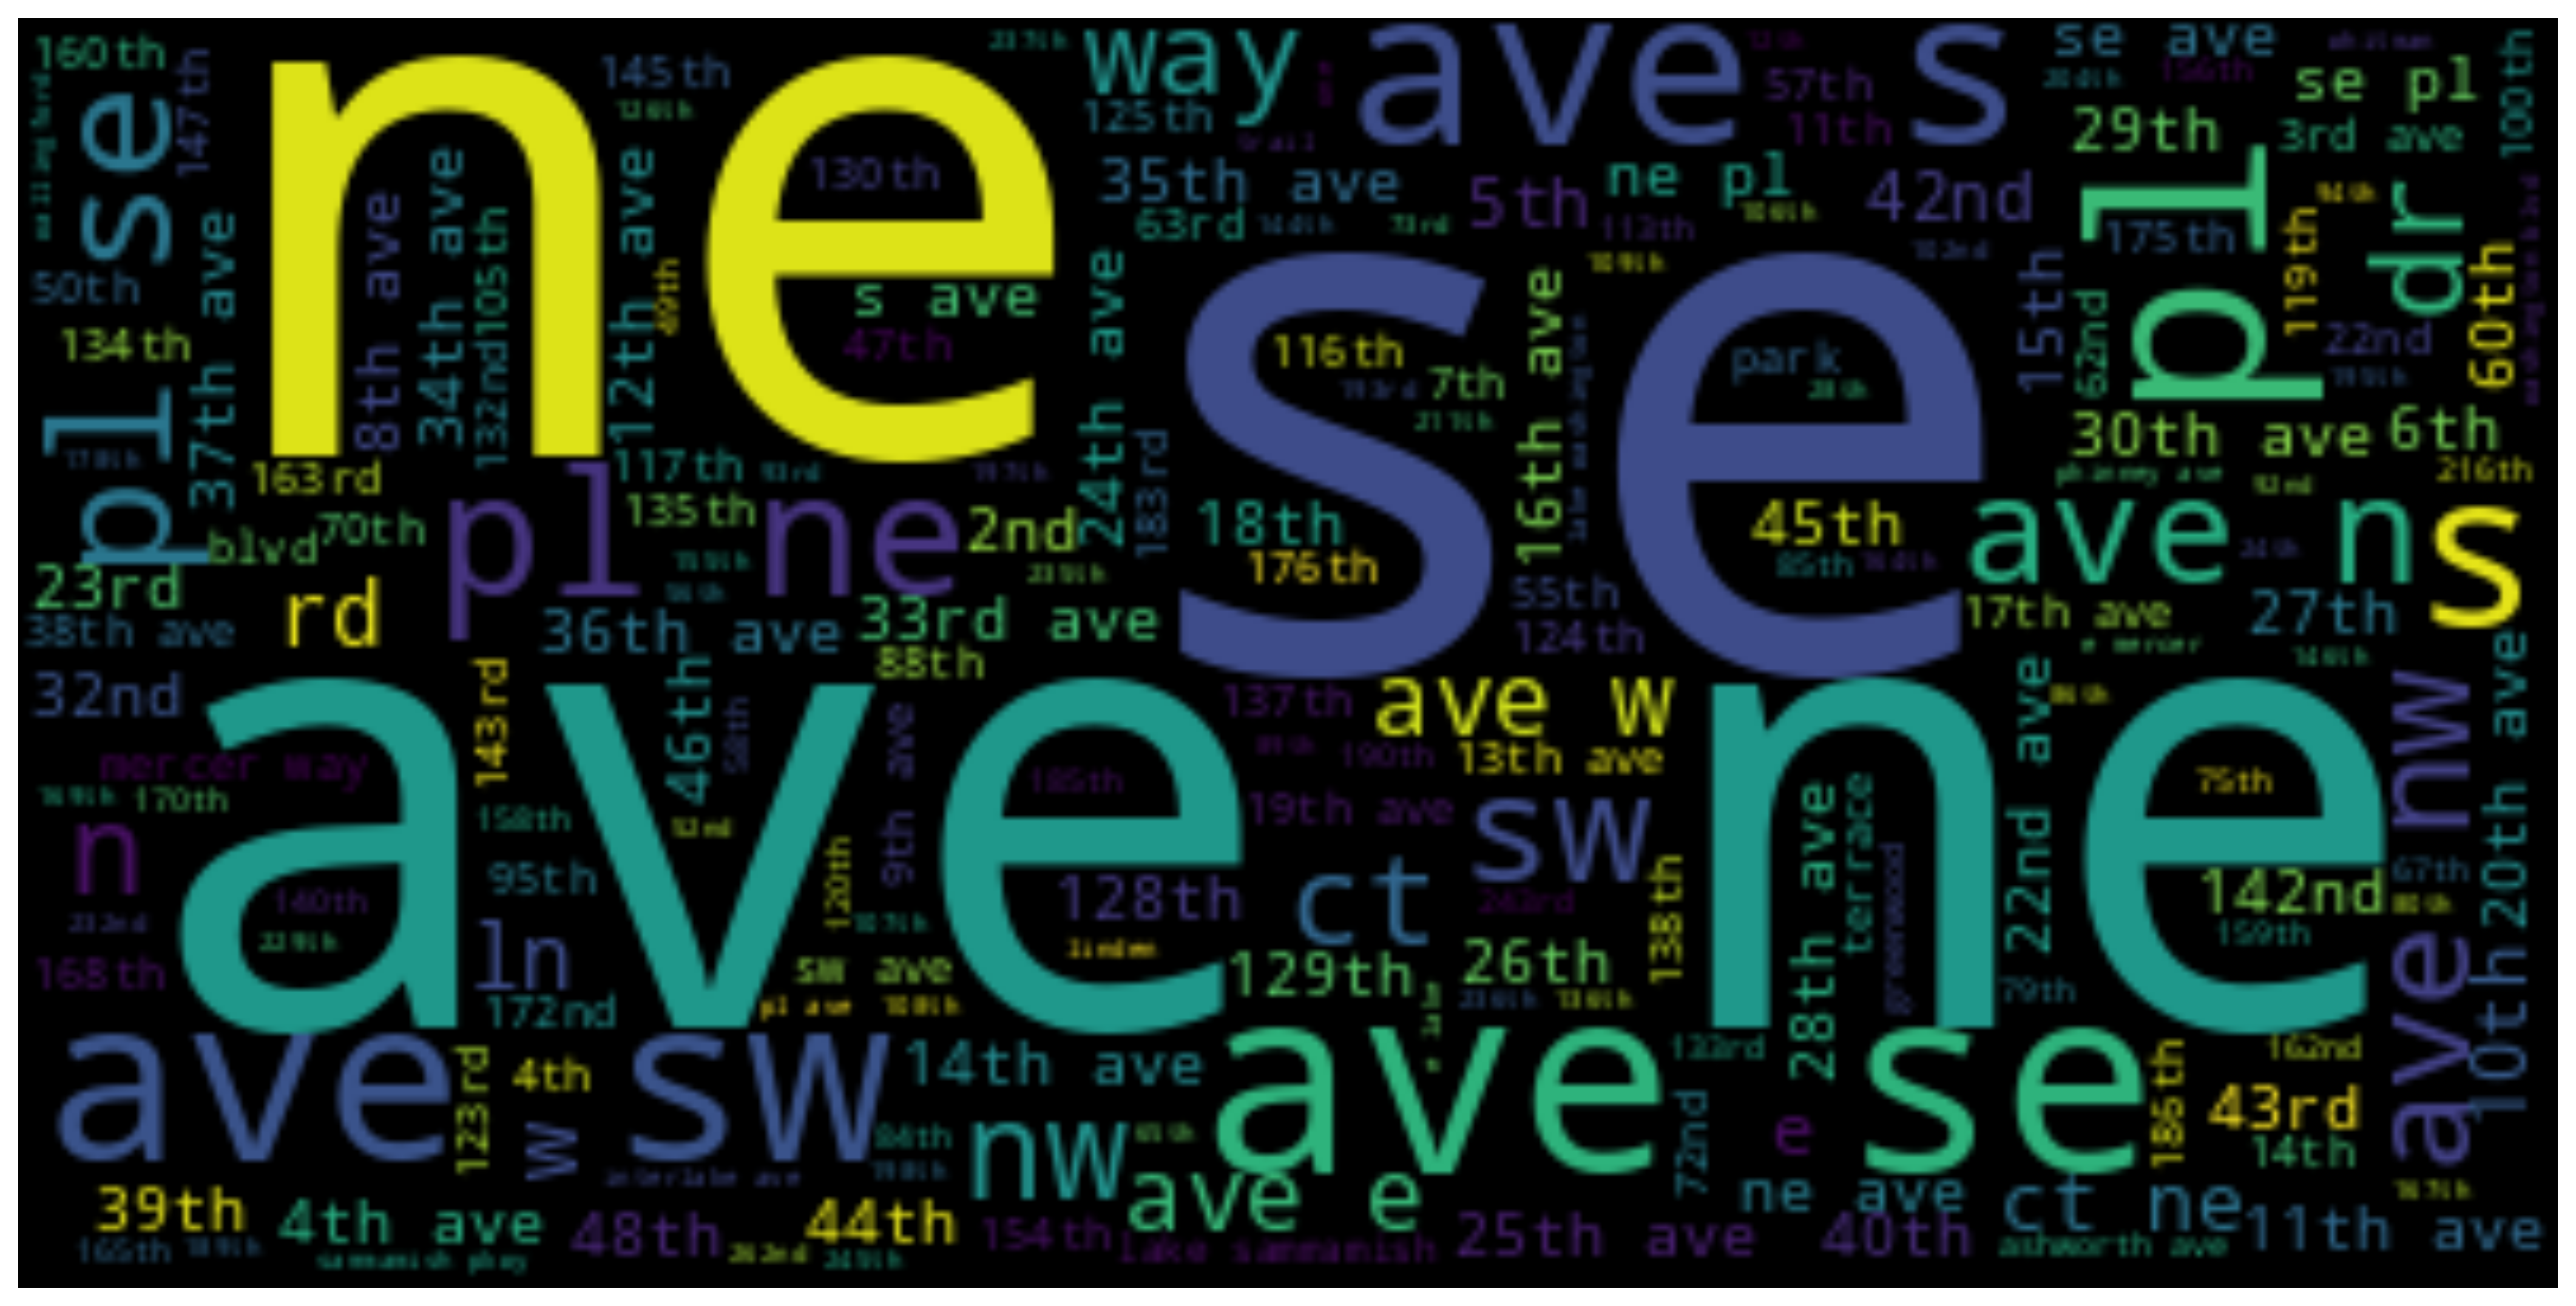

In [9]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Start with one review:
text = " ".join(df.street).lower().replace("st","")

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.figure(figsize=(18, 18), dpi=300)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Bag of Words / TF-IDF (Street Column)

Get Your concepts clear about bag of words from here [Click Here](https://www.mygreatlearning.com/blog/bag-of-words/)

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
import copy

# list of text documents
text = copy.deepcopy(df.street.values)

# create the transform
vectorizer = TfidfVectorizer()

# tokenize and build vocab
vectorizer.fit(text)

# Conversion of Vector To Scalar (Read below why we are doing this)
def vector_to_scalar(vector):
    '''
    Converts Vector to scalar
    
    1. Build an array of ones
    2. Transpose the array to match --> m and p where ((n x m )* (p x q)) are two vectors
    3. Perform Matrix Multiplication
    '''
    vector = vector.reshape(1,-1)
    ones_vector = np.transpose(np.ones(vector.shape))
    return np.matmul(vector, ones_vector).item()

# encode document
def TfIDF(df):
    '''
    Converting Street Coloum into Tf IDF
    
    '''
    df.street = df.street.map(lambda x: vectorizer.transform([x]))
    for index ,i in enumerate(df.street[:5]): print(f"{text[index]} Converted to  {i.data}");
    df.street = df.street.map(lambda x: x.data)
    df.street = df.street.map(lambda x : vector_to_scalar(x))
    return df

df = TfIDF(df)

for i in df.street: print(i); break
    
# Hmmm! Okay I am not so much sure with this coloum. lets try someother thing `:)


Alonzo Ave NW Converted to  [0.4142218  0.20377249 0.88707219]
S 194th St Converted to  [0.30613135 0.95198928]
Highland Dr Converted to  [0.86376172 0.50390047]
SE 182nd St Converted to  [0.29321093 0.28745378 0.91181011]
45th Pl SW Converted to  [0.4277885  0.36179709 0.82831145]
1.5050664796430973


# Converting Vector To scalars

#### Just a little bit of linear Algebra Here. Hehe Dont be scared I will explain


1. Why are we converting Vectors to Scalar?
        TFID gives us a vector, But we cannot feed vector inside a matrix dataset to a neural netword emm i.e

![Matrix1](extras/matrix.png)

        We cannot feed the middle vector to a neural-net model because they are designed to work on a matrix with scalars not with a matrix with vectors. We can also convert vectors to scalar by just flattening but that will not be a good idea becuase when we flatten a vector it becomes [1,1,2,3,2] means convert them into more columns. So a good idea is to reduce a vector to scalar. We will do some matrix maliplication for this





2. How can we convert Vectors to Scalar?

    Multiplying an 𝑚×𝑛 matrix on the right by an 𝑛×𝑝 matrix yields an 𝑚×𝑝 matrix. You have
    𝑣𝑡𝐴𝑣
    which is a 1×𝑛 matrix times an 𝑛×𝑛 matrix times an 𝑛×1 matrix. The result is a 1×1 matrix.


![Resultant Matrix](extras/resultant_matrix.png)

Than after this matrix Multiplication our result will be

![Resultant Matrix](extras/result.png)


by the way @ sign donates that we are doing matrix multiplication

We can also use tensorflow for matrix multiplication

![Resultant Matrix](extras/tf_result.png)


### Converting Other Categorical Labels

Using Label Encoding

In [11]:
from sklearn import preprocessing

# Label Encoder
stateZip_le = preprocessing.LabelEncoder()

# Label Encoder Object SO that we can use them later to perform same pre-processing on test-data
le_obj_dict = dict()


def label_encoding(df, subset):
    
    global le_obj_dict
    # Converting Dataframe Columns
    for i in ["city","statezip"]:

        print(f"Encoding Column : ******* {i} ********")

        # Storing Every Label Encoder Object seperatly
        if subset == 'train':
            le_obj_dict.update({i:preprocessing.LabelEncoder().fit(df[i])})
        
        df[i] = le_obj_dict[i].transform(df[i])

        # Getting label encoder mappings 
        mappings = dict(zip(le_obj_dict[i].classes_, le_obj_dict[i].transform(le_obj_dict[i].classes_)))
        for index, k in enumerate(mappings): 
            print(" {0: <30} ---> {1: <10}".format(k, mappings[k])) 
            if index == 4: 
                break
        print("\n\n\n")
        
    return df
    
df = label_encoding(df, "train")   

Encoding Column : ******* city ********
 Auburn                         ---> 0         
 Bellevue                       ---> 1         
 Black Diamond                  ---> 2         
 Bothell                        ---> 3         
 Burien                         ---> 4         




Encoding Column : ******* statezip ********
 WA 98001                       ---> 0         
 WA 98002                       ---> 1         
 WA 98003                       ---> 2         
 WA 98004                       ---> 3         
 WA 98005                       ---> 4         






In [12]:
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0   544000.0       3.0       2.50         1460      1613     2.0           0   
1        0.0       5.0       2.25         2000      7900     1.0           0   
2  1712500.0       3.0       3.25         2940      5432     3.0           0   
3   365000.0       3.0       2.50         2200      7350     1.0           0   
4   275000.0       3.0       2.50         1720      8755     1.0           0   

   view  condition  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3        1180            280      2007             0   
1     0          4        1300            700      1986             0   
2     3          4        2440            500      1978          2000   
3     0          5        1570            630      1988             0   
4     0          3        1000            720      1983          2009   

     street  city  statezip  
0  1.505066    30        54  
1  1.258121    29        70  
2  1.367662    30        50  
3  1.492475    27        35  
4  1.617897    12        13

## Now lets Standardize our Data


1. Why do we need to standardize our data?

        Standardization comes into picture when features of input data set have large differences between their ranges, or simply when they are measured in different measurement units (e.g., Pounds, Meters, Miles … etc).

        These differences in the ranges of initial features causes trouble to many machine learning models. For example, for the models that are based on distance computation, if one of the features has a broad range of values, the distance will be governed by this particular feature.

        To illustrate this with an example : say we have a 2-dimensional data set with two features, Height in Meters and Weight in Pounds, that range respectively from [1 to 2] Meters and [10 to 200] Pounds. No matter what distance based model you perform on this data set, the Weight feature will dominate over the Height feature and will have more contribution to the distance computation, just because it has bigger values compared to the Height. So, to prevent this problem, transforming features to comparable scales using standardization is the solution.

Get More Insights from here [Click Here Please](https://builtin.com/data-science/when-and-why-standardize-your-data)


In [13]:
X = df.drop('price', axis = 1).to_numpy()
Y = df['price'].to_numpy()

# Shapes Of Our Dataset
print(X.shape)
print(Y.shape)

(3664, 15)
(3664,)


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Oh! Are you Confused Why I Standardize Y. Just Comment this code and train you model.
# You will get the answer (Revise Derivation and back Propagation Concepts)
scaler_Y = StandardScaler()
scaler_Y.fit(Y.reshape(-1, 1))
Y = scaler_Y.transform(Y.reshape(-1, 1)).flatten()

## Model 1 (Basic Model)

In [15]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 1])
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)

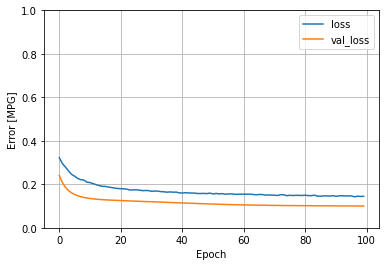

In [16]:
tf.random.set_seed(12)

model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Dense(50, activation = "relu"))
model1.add(tf.keras.layers.Dense(10, activation = "relu"))
model1.add(tf.keras.layers.AlphaDropout(0.3))
model1.add(tf.keras.layers.Dense(1, activation = "sigmoid"))
model1.compile(loss = tf.keras.losses.Huber(), optimizer = tf.keras.optimizers.SGD(), metrics = "mae")

history = model1.fit(X, Y, epochs = 100, validation_split = 0.1, verbose = 0)
plot_loss(history)

# Lets Evaluate Our Model Now

#### Same preprocessing Pipeline
Perform same perprocessing as you perform in Training Dataset


In [17]:
transformed_test = TfIDF(test)
transformed_test = label_encoding(transformed_test, "test")  

X_test = transformed_test.drop('price', axis = 1).to_numpy()
Y_test = transformed_test['price'].to_numpy()

# Shapes Of Our Dataset
print(X_test.shape)
print(Y_test.shape)

scaler = StandardScaler()
scaler.fit(X_test)
X_test = scaler.transform(X_test)

scaler_Y_test = StandardScaler()
scaler_Y_test.fit(Y_test.reshape(-1, 1))
Y_test = scaler_Y_test.transform(Y_test.reshape(-1, 1)).flatten()


Alonzo Ave NW Converted to  [0.31236794 0.29047194 0.90446245]
S 194th St Converted to  [0.45317179 0.26313286 0.85170207]
Highland Dr Converted to  [0.2804065  0.27490076 0.91967481]
SE 182nd St Converted to  [0.35484581 0.26377262 0.89694396]
45th Pl SW Converted to  [0.29266144 0.46470259 0.83570377]
Encoding Column : ******* city ********
 Auburn                         ---> 0         
 Bellevue                       ---> 1         
 Black Diamond                  ---> 2         
 Bothell                        ---> 3         
 Burien                         ---> 4         




Encoding Column : ******* statezip ********
 WA 98001                       ---> 0         
 WA 98002                       ---> 1         
 WA 98003                       ---> 2         
 WA 98004                       ---> 3         
 WA 98005                       ---> 4         




(917, 15)
(917,)


### Model 1 Evaluation

In [18]:
predict_model1 = model1.predict(X_test).flatten()
model1.evaluate(X_test, Y_test)


29/29 [==============================] - 0s 701us/step - loss: 0.2338 - mae: 0.5529


[0.23376503586769104, 0.5529405474662781]

# Model Optimization

These improvements are totally random. I just took 1000 of experiments to check which paramter get fit with our data

### Changes

1. Change optimizer to adam (0.0001 improvement) 
2. Change Activation of last layer from sigmoid to tanh (2 units improvement)
3. Reduce Layers
4. Increase Number of epochs
5. Change huber loss to mae

### Lets check the loss fucntion now

There are 3 types of loss that we mostly use in regression problem

1. Mean Squared Error
2. Mean Absolute Error
3. Huber Loss


#### Mean Squared Error
Mean Square error is the square of **Actual - Prediction** and than divided by total number of points. So as we are squaring the number means the larger value have larger impact becaused it is been sqaured than than processed. Get So? So we used this error when Larger values are more significant than smaller values. This error is also known as L2 error and more sensitive to the outliers




![mean square error](extras/mean_squared_error.svg)
 
* MSE	=	mean squared error
* n	=	number of data points
* Y	=	observed values
* ÿ   =	predicted values


### Mean Absolute Error
Mean absolute error Subtract Predicted value from the actual value (Make it positive if it's negative) than divide it by the total number of points we have. We use it when small error as well as large errors equally important for us. Like in House prediction problem we dont really care about cents but about dollars So Larger error are important for us. I hope you get it now. MAE is also known as L1 loss and robust to Outliers.

![Mean Absolute error](extras/mean_absolute_error.svg)

* MAE	=	mean absolute error
* n	=	number of data points
* Y	=	observed values
* x   =	predicted values

### Huber Loss
Huber loss is the combination of Mean Asbolute error and Mean Squared error. Huber loss is less sensitive to outliers in data than the squared error loss. It’s also differentiable at 0. It’s basically absolute error, which becomes quadratic when error is small. How small that error has to be to make it quadratic depends on a hyperparameter, 𝛿 (delta), which can be tuned. Huber loss approaches MSE when 𝛿 ~ 0 and MAE when 𝛿 ~ ∞ (large numbers.) 

![Huber Loss](extras/huber.png)


* n	=	number of data points
* Y	=	observed values
* x   =	predicted values
* 𝛿  = is Hyperparameter which is decided by the user according to the problem

In [ ]:
# Training
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Dense(40, activation = "relu"))
model2.add(tf.keras.layers.Dense(1, activation = "tanh"))
model2.compile(loss = tf.keras.losses.mae, optimizer = tf.keras.optimizers.Adam(lr = 0.01), metrics = "mae")

history = model2.fit(X, Y, epochs = 300, validation_split = 0.1, verbose = 0)
plot_loss(history)

predict_model2 = model2.predict(X_test).flatten()
model2.evaluate(X_test, Y_test)

/home/sohaib/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


# Model Performace Graphs

In [ ]:
import plotly.graph_objects as go

index = np.asarray([i for i in range(len(Y_test))])

# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(y=predict_model1, x= index,
                    mode='lines',
                    name='SGD_Optimizer (MODEL 1)'))

fig.add_trace(go.Scatter(y=predict_model2, x= index,
                    mode='lines',
                    name='Adam_Optimizer (MODEL 2)'))

fig.add_trace(go.Scatter(y=Y, x=index,
                    mode='lines',
                    name='Actual'))


fig.update_layout(
    title="Model Performance",
    xaxis_title="Index",
    yaxis_title="House Price Prediction",

)

fig.show() 